<a href="https://colab.research.google.com/github/mleyvaz/Neural-networks/blob/main/Kaggle_imagenes_SVM_AUTOMLs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import os 
os.environ['KAGGLE_CONFIG_DIR']="/content/gdrive/MyDrive/cancer"


In [ ]:
%cd /content/gdrive/MyDrive/cancer

/content/gdrive/MyDrive/cancer


In [ ]:
!kaggle datasets download -d simjeg/lymphoma-subtype-classification-fl-vs-cll

100% 32.6M/32.6M [00:00<00:00, 103MB/s] 



In [ ]:
!ls

kaggle.json  lymphoma-subtype-classification-fl-vs-cll.zip


In [ ]:
!apt install unzip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
unzip is already the newest version (6.0-21ubuntu1.1).
0 upgraded, 0 newly installed, 0 to remove and 17 not upgraded.


In [ ]:
!unzip lymphoma-subtype-classification-fl-vs-cll.zip

Archive:  lymphoma-subtype-classification-fl-vs-cll.zip
  inflating: X.npy                   
  inflating: Y.npy                   


In [ ]:
import numpy as np
X = np.load('X.npy') # images
Y = np.load('Y.npy') # labels associated to images (0 = no IDC, 1 = IDC)

In [ ]:
def describeData(a,b):
    print('Total number of images: {}'.format(len(a)))
    print('Number of IDC(-) Images: {}'.format(np.sum(b==0)))
    print('Number of IDC(+) Images: {}'.format(np.sum(b==1)))
    print('Percentage of positive images: {:.2f}%'.format(100*np.mean(b)))
    print('Image shape (Width, Height, Channels): {}'.format(a[0].shape))
describeData(X,Y)

Total number of images: 5547
Number of IDC(-) Images: 2759
Number of IDC(+) Images: 2788
Percentage of positive images: 50.26%
Image shape (Width, Height, Channels): (50, 50, 3)


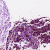

In [ ]:
import cv2  
from google.colab.patches import cv2_imshow # for image display
from PIL import Image 
import matplotlib.pylab as plt
imgs0 = X[Y==0] # (0 = no IDC, 1 = IDC)
imgs1 = X[Y==1] 
cv2_imshow(imgs0[100])   

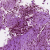

In [ ]:
cv2_imshow(imgs1[100])

In [ ]:
import sklearn.model_selection as model_selection
X_train, X_test, Y_train, Y_test =  model_selection.train_test_split(X, Y, test_size=0.2)

In [ ]:
X_trainShape = X_train.shape[1]*X_train.shape[2]*X_train.shape[3]
X_testShape = X_test.shape[1]*X_test.shape[2]*X_test.shape[3]

X_trainFlat = X_train.reshape(X_train.shape[0], X_trainShape)
X_testFlat = X_test.reshape(X_test.shape[0], X_testShape)
X_testFlat[100]

array([124,  82, 130, ..., 212, 157, 178], dtype=uint8)

Máquina de soporte vectorial
https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [ ]:
from sklearn.svm import SVC

def svm(a,b,c,d):
    """Run LogisticRegression w/ Kfold CV"""
    model = SVC()
    model.fit(a,b)
    kfold = model_selection.KFold(n_splits=10)
    accuracy = model_selection.cross_val_score(model, c,d, cv=kfold, scoring='accuracy')
    mean = accuracy.mean() 
    stdev = accuracy.std()
    print('SVM - Training set accuracy: %s (%s)' % (mean, stdev))
    print('')
svm(X_trainFlat, Y_train, X_testFlat, Y_test)

SVM - Training set accuracy: 0.7576576576576576 (0.03333333333333332)



# AutoML programacion genética
http://epistasislab.github.io/tpot/


In [ ]:
pip install tpot

     |████████████████████████████████| 92kB 7.6MB/s 
     |████████████████████████████████| 163kB 13.9MB/s 
     |████████████████████████████████| 157.5MB 92kB/s 
  Created wheel for stopit: filename=stopit-1.1.2-cp36-none-any.whl size=11957 sha256=dd717d652ddb1493a809292d19deefb00d4d776ba03a0d5ad023925ce3fc8c32
  Stored in directory: /root/.cache/pip/wheels/3c/85/2b/2580190404636bfc63e8de3dff629c03bb795021e1983a6cc7
Successfully built stopit
  Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


AutoKeras
https://autokeras.com/

In [45]:
!pip install autokeras

     |████████████████████████████████| 174kB 17.5MB/s 
     |████████████████████████████████| 71kB 11.7MB/s 
  Created wheel for keras-tuner: filename=keras_tuner-1.0.2-cp36-none-any.whl size=78939 sha256=aa24b96d25a9e6e1cc782c7ae90ec1037f1f6ca6d4b18ed52ef194be37055850
  Stored in directory: /root/.cache/pip/wheels/bb/a1/8a/7c3de0efb3707a1701b36ebbfdbc4e67aedf6d4943a1f463d6
  Created wheel for terminaltables: filename=terminaltables-3.1.0-cp36-none-any.whl size=15358 sha256=68068282bf5235bf69c887b8c1d4482f1e7064be9da8bea572afe3499edec4e0
  Stored in directory: /root/.cache/pip/wheels/30/6b/50/6c75775b681fb36cdfac7f19799888ef9d8813aff9e379663e
Successfully built keras-tuner terminaltables


In [48]:
import autokeras as ak

clf = ak.ImageClassifier(max_trials = 10)

clf.fit(X_train, Y_train,epochs=2)
results = clf.predict(X_test)

INFO:tensorflow:Reloading Oracle from existing project ./image_classifier/oracle.json
INFO:tensorflow:Reloading Tuner from ./image_classifier/tuner0.json
INFO:tensorflow:Oracle triggered exit
Epoch 1/2
139/139 [==============================] - 3s 16ms/step - loss: 0.5494 - accuracy: 0.7194
Epoch 2/2
139/139 [==============================] - 2s 14ms/step - loss: 0.4814 - accuracy: 0.7820
INFO:tensorflow:Assets written to: ./image_classifier/best_model/assets


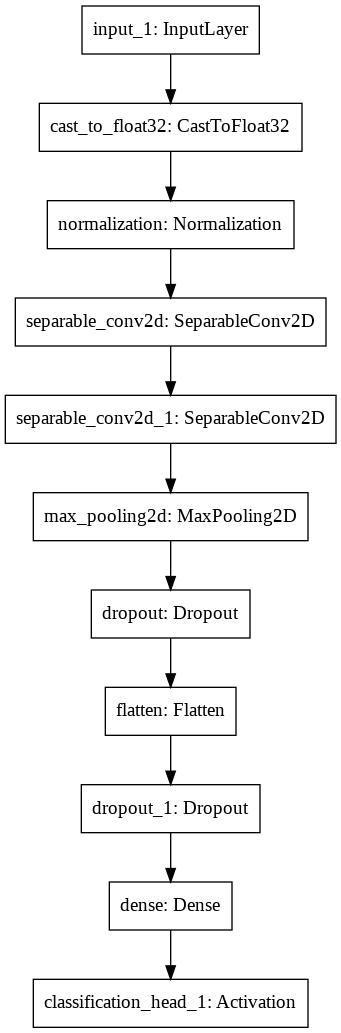

In [49]:
from keras.utils.vis_utils import plot_model
model=clf.export_model()
plot_model(model)